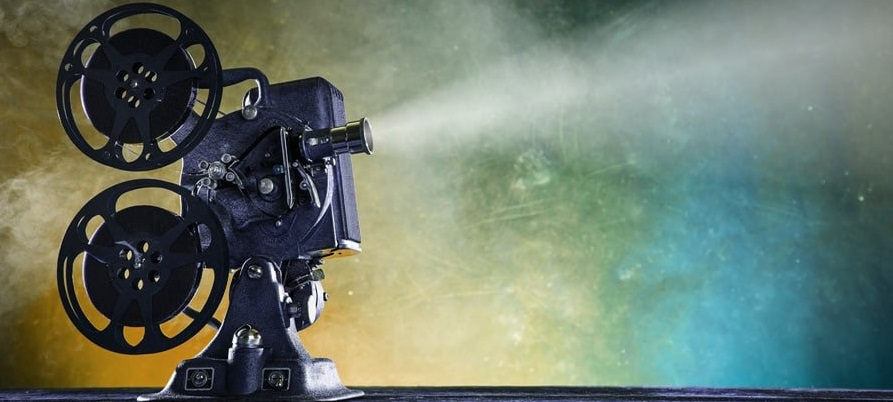

   
# Microsoft Movie Analysis 

#### Author: Nurgul Kurbanli kyzy

## Project overview

I have been charged with exploring what types of films are currently doing the best at the box office then translating those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. Based on the datasets available have been found as a successful movie genres  are fantasy, mystery and  horror that production budget over the 1 million dollars. The most profitable movie directors - Francis Lawrence, Kenneth Branagh, Zack Snyder, and screenwriters - Brian Lynch, Christopher Nolan, Jack Kirby that produced more than 5 movies each. Microsoft can use this analysis to target their genres, movie directors, and screenwriters of their upcoming movie endeavors to earn the highest amount of revenue possible.

## Business Problem

Most of the big  companies were creating an original  video content. Microsoft also wanted to try its hand at this field by creating its own movie studio. Even though they were willing to invest, they were not  sure where to start, without  having enough knowledge about the movie  industry. To help Microsoft, I was instructed to study which types of films are currently showing the best results at the box office, and translate my findings into actionable insights that the head of Microsoft can decide what the content of the studio shoul be. There are many aspects of films that can affect to profitability, having studied them, I based my analysis on three main factors:

- <b>Movie Genres</b> (categories that define a movie based on its narrative elements): Which genres of movie content are currently the most successful in terms of their return on investment (ROI)?
- <b>Movie Directors</b> (gives a film creative direction by guiding actors through each scene): Who are the top directors from the standpoint of movies profitability?
- <b>Movie Writers</b> (writes movie scripts or screenplays): Who are the top  screenwriters in terms of the  movies' average profit?

I assume that the answers to these questions are one of the main parts of the steps that should be taken into account to create the most cost-effective film in the digital world.

## Data Understanding



I used two different movie data sources for my analysis to get the broadest view of the movie industry
- *The Numbers* - film industry data website that tracks box office revenue in a systematic, algorithmic way.
The first pre-unfiltered dataset tn_movies is in the format of  compressed CSV file. Dataset contains 5782 values for movies' release date, title, production budget, domestic gross, and worldwide gross in dollars.Since most of the column attributes contained numeric values,  movies' profit and return on investment has been calculated based on this dataset
- *Internet Movie Database (IMDB)* - website that provides information about millions of films and television programs as well as their cast and crew. 
 The second dataset IMDB is located in a SQLite database. For the purpose of my analysis I eliminated several SQL tables that are peoples (basic information about the people that were involved to the particular movies), directors, writers, movie basics. They all were related to each other throughout the movie_id.

In [1]:
# Importing requred packages for my analysis
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format  # pandas display setting to not display sceintific notation 
import sqlite3

# Data Visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import altair as alt
import altair_viewer
alt.renderers.enable('altair_viewer', inline=True)

RendererRegistry.enable('altair_viewer')

### The Numbers Data 

In [2]:
# reading the csv file
tn_movies = pd.read_csv('./data/tn.movie_budgets.csv.gz')
# getting info for DataFrame
tn_movies.info()
# previewing the DataFrame
tn_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Based on the preview the dollar amounts for production budget, domestic and worldwide gross was pulled as an objects (not float/integer). This requires further adjusting in the next stages.

### IMDB Data

In [3]:
# connceting to SQL file
conn = sqlite3.connect('./data/im.db')

In [4]:
# reading SQL file
imdb_genres = pd.read_sql('''
 SELECT *
 FROM movie_basics

;''', conn)

In [5]:
# getting info for DataFrame
imdb_genres.info()

# previewing the DataFrame
imdb_genres.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [6]:
# reading sql files
imdb_direc = pd.read_sql('''
 SELECT primary_name, movie_id
 FROM persons
 JOIN directors
 ON persons.person_id = directors.person_id

;''', conn)

In [7]:
# getting info for DataFrame
imdb_direc.info()

# previewing the DataFrame
imdb_direc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291171 entries, 0 to 291170
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   primary_name  291171 non-null  object
 1   movie_id      291171 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


,primary_name,movie_id
0,Ruel S. Bayani,tt1592569
1,Ruel S. Bayani,tt1592569
2,Ruel S. Bayani,tt1592569
3,Ruel S. Bayani,tt1592569
4,Ruel S. Bayani,tt2057445


In [8]:
# reading sql files
imdb_write = pd.read_sql('''
 SELECT primary_name, movie_id
 FROM persons
 JOIN writers
 ON persons.person_id = writers.person_id


;''', conn)

In [9]:
# getting info for DataFrame
imdb_write.info()

# previewing the DataFrame
imdb_write.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255871 entries, 0 to 255870
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   primary_name  255871 non-null  object
 1   movie_id      255871 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


,primary_name,movie_id
0,Bryan Beasley,tt3501180
1,Michael Frost Beckner,tt6349302
2,Hava Kohav Beller,tt7701650
3,Joel Bender,tt3790232
4,Joel Bender,tt3790232
5,Doug Benson,tt1975283
6,Joe Berlinger,tt3137552
7,Joe Berlinger,tt6794462
8,Jamie Bernstein,tt4601198
9,Dusty Bias,tt1374996


## Data Preparation

In this step, I will ensure accuracy in the data by cleaning and transforming raw data into a form that can readily and accurately be analyzed.

### Data Cleaning

In [10]:
# displaying all column names 
tn_movies.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [11]:
# dropping unnecessary columns
tn_movies.drop(['id', 'release_date','domestic_gross'], axis=1, inplace=True)

In [12]:
# renaming the column 
tn_movies.rename(columns = {'movie':'title'}, inplace = True) 

In [13]:
# removing dollar signs and commas from dollar amounts
tn_movies['production_budget'] = [str(i).replace("$", "") for i in tn_movies['production_budget']]
tn_movies['production_budget'] = tn_movies['production_budget'].apply(lambda x: str(x).replace(',','') ) 
# converting dollar amounts from strings into integers
tn_movies['production_budget'] = tn_movies['production_budget'].astype(int) 


In [14]:
# preview the cleaned values  
tn_movies['production_budget'].head()

0    425000000
1    410600000
2    350000000
3    330600000
4    317000000
Name: production_budget, dtype: int32

In [15]:
# removing dollar signs and commas from dollar amounts
tn_movies['worldwide_gross'] = [str(i).replace("$", "") for i in tn_movies['worldwide_gross']]
tn_movies['worldwide_gross'] = [str(i).replace(",", "") for i in tn_movies['worldwide_gross']]
# converting dollar amounts from strings into float
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].astype(float) 

In [16]:
# preview cleaned bottom values 
tn_movies['worldwide_gross'].tail()

5777        0.00
5778   240495.00
5779     1338.00
5780        0.00
5781   181041.00
Name: worldwide_gross, dtype: float64

In [17]:
# dropping column values that contain 0.0 in it
tn_movies.drop(tn_movies.loc[tn_movies['worldwide_gross']==0.0].index, inplace=True)

In [18]:
# checking number of duplicate values
imdb_direc.duplicated().sum()

127876

In [19]:
# dropping duplicate values
imdb_direc.drop_duplicates()

,primary_name,movie_id
0,Ruel S. Bayani,tt1592569
4,Ruel S. Bayani,tt2057445
7,Ruel S. Bayani,tt2590280
8,Ruel S. Bayani,tt8421806
10,Bryan Beasley,tt3501180
...,...,...
291164,Zheng Wei,tt8697720
291165,Rama Narayanan,tt8715016
291167,Rama Narayanan,tt8919136
291168,Samir Eshra,tt8717234


In [20]:
imdb_direc.rename(columns = {'primary_name':'direc_name'}, inplace = True) 

In [21]:
# checking number of duplicate values
imdb_write.duplicated().sum()

77763

In [22]:
# dropping duplicate values
imdb_write.drop_duplicates().head()

,primary_name,movie_id
0,Bryan Beasley,tt3501180
1,Michael Frost Beckner,tt6349302
2,Hava Kohav Beller,tt7701650
3,Joel Bender,tt3790232
5,Doug Benson,tt1975283


In [23]:
imdb_write.rename(columns = {'primary_name':'writer_name'}, inplace = True) 

In [24]:
# dropping null values
imdb_write.dropna(subset=['writer_name'],inplace=True)
imdb_write.isnull().sum()

writer_name    0
movie_id       0
dtype: int64

In [25]:
# checking for null values in the DataFrame
imdb_genres.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [26]:
# dropping the null values
imdb_genres.dropna(subset=['genres'], inplace=True)

In [27]:
imdb_genres.isnull().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [28]:
# dropping unnecessary columns
imdb_genres.drop(['primary_title', 'start_year','runtime_minutes'], axis=1, inplace=True)

### Data Merging

In [29]:
# merging tables based on their movie id key values
direc_genre = pd.merge(imdb_direc, imdb_genres, how="inner", on='movie_id')
direc_genre.head()

,direc_name,movie_id,original_title,genres
0,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance"
1,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance"
2,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance"
3,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance"
4,Ruel S. Bayani,tt2057445,No Other Woman,"Drama,Romance,Thriller"


In [30]:
dir_genre_wrt = pd.merge(direc_genre, imdb_write, how="inner", on='movie_id')
dir_genre_wrt

,direc_name,movie_id,original_title,genres,writer_name
0,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Henry King Quitain
1,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Kriz G. Gazmen
2,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Ralph Jacinto Quiblat
3,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Camille Andrea Mangampat
4,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Henry King Quitain
...,...,...,...,...,...
47571101,Abu Iddris,tt8574516,HashTag,Thriller,Abu Iddris
47571102,Tisha Griffith,tt8574866,Black Girl Magic the Documentary,Documentary,Tisha Griffith
47571103,Roberto Farías,tt8274328,Perkin,Drama,Roberto Farías
47571104,Rich Allen,tt8685584,Home Cookin: 5.17.18,"Biography,Comedy,Family",Rich Allen


In [31]:
dir_genre_wrt.drop_duplicates(subset='movie_id', keep="first", inplace=True)
dir_genre_wrt

,direc_name,movie_id,original_title,genres,writer_name
0,Ruel S. Bayani,tt1592569,Paano na kaya,"Drama,Romance",Henry King Quitain
16,Ruel S. Bayani,tt2057445,No Other Woman,"Drama,Romance,Thriller",Ricardo Fernando III
25,Ruel S. Bayani,tt2590280,One More Try,Drama,Xiaoshuai Wang
26,Bryan Beasley,tt3501180,The Quiet Philanthropist: The Edith Gaylord Story,"Documentary,History",Bryan Beasley
27,Hans Beimler,tt2098699,Haraka,Drama,Simon Lebsekal
...,...,...,...,...,...
47571101,Abu Iddris,tt8574516,HashTag,Thriller,Abu Iddris
47571102,Tisha Griffith,tt8574866,Black Girl Magic the Documentary,Documentary,Tisha Griffith
47571103,Roberto Farías,tt8274328,Perkin,Drama,Roberto Farías
47571104,Rich Allen,tt8685584,Home Cookin: 5.17.18,"Biography,Comedy,Family",Rich Allen


In [32]:
# merging tables based on the movies' title
final_df = pd.merge(tn_movies, dir_genre_wrt, how="inner",left_on='title', right_on='original_title')
final_df.head()

,title,production_budget,worldwide_gross,direc_name,movie_id,original_title,genres,writer_name
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875.00,Rob Marshall,tt1298650,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Terry Rossio
1,Dark Phoenix,350000000,149762350.00,Simon Kinberg,tt6565702,Dark Phoenix,"Action,Adventure,Sci-Fi",Jack Kirby
2,Avengers: Age of Ultron,330600000,1403013963.00,Joss Whedon,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",Jack Kirby
3,Avengers: Infinity War,300000000,2048134200.00,Joe Russo,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",Keith Giffen
4,Justice League,300000000,655945209.00,Zack Snyder,tt0974015,Justice League,"Action,Adventure,Fantasy",Bob Kane


In [33]:
# splitting values into a list     
final_df['genres'] =final_df['genres'].apply(lambda x: x.split(','))     

In [34]:
# dropping unnecessary column
final_df.drop(['original_title'], axis=1, inplace=True)

In [35]:
# preview the DataFrame 
final_df.head()

,title,production_budget,worldwide_gross,direc_name,movie_id,genres,writer_name
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875.00,Rob Marshall,tt1298650,"[Action, Adventure, Fantasy]",Terry Rossio
1,Dark Phoenix,350000000,149762350.00,Simon Kinberg,tt6565702,"[Action, Adventure, Sci-Fi]",Jack Kirby
2,Avengers: Age of Ultron,330600000,1403013963.00,Joss Whedon,tt2395427,"[Action, Adventure, Sci-Fi]",Jack Kirby
3,Avengers: Infinity War,300000000,2048134200.00,Joe Russo,tt4154756,"[Action, Adventure, Sci-Fi]",Keith Giffen
4,Justice League,300000000,655945209.00,Zack Snyder,tt0974015,"[Action, Adventure, Fantasy]",Bob Kane


### Feature Engineering

In order to be able to get visual insights about range of the production budgetI decided to devide production budget column into 10 categories in ascending order.

In [36]:
# creating new list that containing categorical values

budget_bin=[]
for x in final_df['production_budget']: 
    if x>0 and x<1000000: 
        budget_bin.append('till_1M')
    elif x< 10000000:
        budget_bin.append('1M_10M')
    elif x< 30000000:
        budget_bin.append ('10M_30M')
    elif x<50000000:
        budget_bin.append ('30M_50M')
    elif x<70000000:
         budget_bin.append ('50M_70M')
    elif x<90000000:
        budget_bin.append ('70M_90M')
    elif x<130000000:
         budget_bin.append ('90M_130M')
    elif  x<150000000:
        budget_bin.append ('130M_150M')
    elif x<170000000:
        budget_bin.append ('150M_170M')   
    else:
        budget_bin.append ('over_170M')

In [37]:
# creating new column
final_df['budget_bins'] = budget_bin

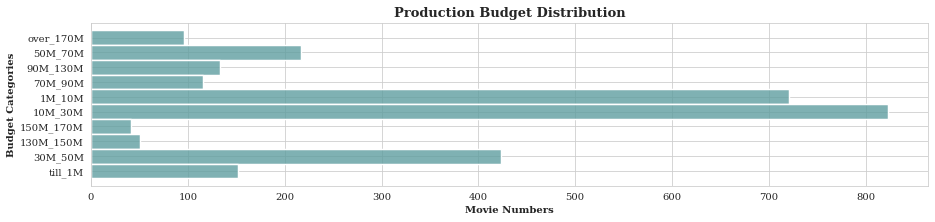

In [38]:
# creating barplot
plt.figure(figsize=(15,3))

sns.set_style('whitegrid',{'font.family':'serif', 'font.serif':['Times New Roman']})

ax = sns.histplot(final_df, y='budget_bins', bins=10, multiple="stack", color='cadetblue',alpha=0.8)

plt.title("Production Budget Distribution", fontdict= { 'fontsize': 13, 'fontweight':'bold'})
plt.xlabel("Movie Numbers", fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel("Budget Categories", fontdict= { 'fontsize': 10, 'fontweight':'bold'})

plt.savefig('./images/fig1.png')
plt.show()

Based on the bar graph above I will  analyze the movies that production budgets starting from the 1 Million.  

In [39]:
#drop rows that contain values 'till_1M' in the 'tn_movies' 
final_df= final_df[final_df.budget_bins != 'till_1M']
final_df.shape
final_df.tail()

,title,production_budget,worldwide_gross,direc_name,movie_id,genres,writer_name,budget_bins
2633,Special,1000000,26822.00,Ann P Meredith,tt3869446,[Drama],Ann P Meredith,1M_10M
2634,The Sisterhood of Night,1000000,6870.00,Caryn Waechter,tt1015471,"[Drama, Mystery, Thriller]",Marilyn Fu,1M_10M
2635,Heli,1000000,552614.00,Amat Escalante,tt2852376,"[Crime, Drama, Romance]",Ayhan Ergürsel,1M_10M
2636,Karachi se Lahore,1000000,17721.00,Wajahat Rauf,tt4590482,"[Adventure, Comedy, Family]",Yasir Hussain,1M_10M
2637,American Hero,1000000,26.00,Nick Love,tt4733536,"[Action, Comedy, Drama]",Nick Love,1M_10M


Further I will calculate movies' Return on Investment (ROI)  by  diividing the film's box office earning by the production budget and multiplying the result by 100. The resulting numbers are expressed as a percentage.

In [40]:
# calculating the profit and assigning values to new column
final_df['profit'] = final_df['worldwide_gross'] -final_df['production_budget']

# sorting values in ascending order
final_df.sort_values(by=['profit'],ascending=False)

final_df.head()

,title,production_budget,worldwide_gross,direc_name,movie_id,genres,writer_name,budget_bins,profit
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875.00,Rob Marshall,tt1298650,"[Action, Adventure, Fantasy]",Terry Rossio,over_170M,635063875.00
1,Dark Phoenix,350000000,149762350.00,Simon Kinberg,tt6565702,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,-200237650.00
2,Avengers: Age of Ultron,330600000,1403013963.00,Joss Whedon,tt2395427,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,1072413963.00
3,Avengers: Infinity War,300000000,2048134200.00,Joe Russo,tt4154756,"[Action, Adventure, Sci-Fi]",Keith Giffen,over_170M,1748134200.00
4,Justice League,300000000,655945209.00,Zack Snyder,tt0974015,"[Action, Adventure, Fantasy]",Bob Kane,over_170M,355945209.00


In [41]:
# calculating Return on Investment and assigning values to new column
final_df['roi'] = (final_df['profit'] / final_df['production_budget'])*100

# sorting values in ascending order
final_df.sort_values(by=['roi'],ascending=False).reset_index()

,index,title,production_budget,worldwide_gross,direc_name,movie_id,genres,writer_name,budget_bins,profit,roi
0,2599,Rocky,1000000,225000000.00,Adnan A. Shaikh,tt9430578,"[Action, Drama, Romance]",Vihar Ghag,1M_10M,224000000.00,22400.00
1,2562,Snow White and the Seven Dwarfs,1488000,184925486.00,Paul Hendy,tt9691476,"[Comedy, Drama, Fantasy]",Paul Hendy,1M_10M,183437486.00,12327.79
2,2600,The Devil Inside,1000000,101759490.00,William Brent Bell,tt1560985,[Horror],William Brent Bell,1M_10M,100759490.00,10075.95
3,2601,The Devil Inside,1000000,101759490.00,Joaquin Perea,tt0436230,"[Horror, Thriller]",Robert Shaw,1M_10M,100759490.00,10075.95
4,313,Cinderella,2900000,263591415.00,Kenneth Branagh,tt1661199,"[Drama, Family, Fantasy]",Charles Perrault,1M_10M,260691415.00,8989.36
...,...,...,...,...,...,...,...,...,...,...,...
2616,2118,Tracker,6500000,3149.00,Ian Sharp,tt1414378,"[Action, Adventure, Drama]",Nicolas van Pallandt,1M_10M,-6496851.00,-99.95
2617,1686,Broken Horses,15000000,3471.00,Vidhu Vinod Chopra,tt2503954,"[Action, Crime, Drama]",Vidhu Vinod Chopra,10M_30M,-14996529.00,-99.98
2618,1994,Skin Trade,9000000,1242.00,Ekachai Uekrongtham,tt1641841,"[Action, Crime, Thriller]",Dolph Lundgren,1M_10M,-8998758.00,-99.99
2619,1995,Skin Trade,9000000,1242.00,Shannon Keith,tt1576702,[Documentary],Shannon Keith,1M_10M,-8998758.00,-99.99


In [42]:
# dropping unnecessary columns
final_df.drop(['worldwide_gross'], axis=1, inplace=True)


In [43]:
final_df.head()

,title,production_budget,direc_name,movie_id,genres,writer_name,budget_bins,profit,roi
0,Pirates of the Caribbean: On Stranger Tides,410600000,Rob Marshall,tt1298650,"[Action, Adventure, Fantasy]",Terry Rossio,over_170M,635063875.00,154.67
1,Dark Phoenix,350000000,Simon Kinberg,tt6565702,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,-200237650.00,-57.21
2,Avengers: Age of Ultron,330600000,Joss Whedon,tt2395427,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,1072413963.00,324.38
3,Avengers: Infinity War,300000000,Joe Russo,tt4154756,"[Action, Adventure, Sci-Fi]",Keith Giffen,over_170M,1748134200.00,582.71
4,Justice League,300000000,Zack Snyder,tt0974015,"[Action, Adventure, Fantasy]",Bob Kane,over_170M,355945209.00,118.65


To begin with, I will extract genres from the list of films and find the total number of genres of movies. Then I will find the best genres based on their Retorn on Investments.

In [44]:
# transforming each element of a list-like to a row
exploded_genres =final_df.explode('genres')

In [45]:
# returning counts of unique values
exploded_genres['genres'].value_counts()

Drama          1315
Comedy          669
Action          591
Thriller        452
Adventure       433
Crime           331
Horror          309
Romance         278
Mystery         195
Biography       189
Documentary     187
Sci-Fi          179
Fantasy         173
Family          148
Animation       126
History          68
Music            64
Sport            51
War              33
Musical          22
Western          19
News              5
Name: genres, dtype: int64

In [46]:
# changing musical values into the music
exploded_genres['genres'] = exploded_genres['genres'].str.replace( 'Musical', 'Music')

In [47]:
# returning new counts of unique values
exploded_genres['genres'].value_counts()

Drama          1315
Comedy          669
Action          591
Thriller        452
Adventure       433
Crime           331
Horror          309
Romance         278
Mystery         195
Biography       189
Documentary     187
Sci-Fi          179
Fantasy         173
Family          148
Animation       126
Music            86
History          68
Sport            51
War              33
Western          19
News              5
Name: genres, dtype: int64

In [48]:
#  splitting the values into groups based on mean
genre_roi = exploded_genres.groupby('genres').mean().reset_index().sort_values('roi', ascending=False)
genre_roi['genres'] =genre_roi['genres'].map(str.upper)
genre_roi

,genres,production_budget,profit,roi
9,FANTASY,70782919.01,150549632.76,566.20
11,HORROR,22127378.64,48977881.39,549.84
13,MYSTERY,25859512.94,54168412.89,473.46
18,THRILLER,31154431.70,58549084.63,332.40
8,FAMILY,55739043.88,131171138.18,332.09
12,MUSIC,21891154.03,82356456.01,327.48
2,ANIMATION,88697448.37,248371031.86,317.39
15,ROMANCE,21695064.75,37415721.19,304.17
17,SPORT,27086274.51,49707760.43,298.63
4,COMEDY,37956354.17,83041435.21,253.51


In [49]:
# selectiong top 15 genres
top_genre = genre_roi.head(15)
top_genre

,genres,production_budget,profit,roi
9,FANTASY,70782919.01,150549632.76,566.20
11,HORROR,22127378.64,48977881.39,549.84
13,MYSTERY,25859512.94,54168412.89,473.46
18,THRILLER,31154431.70,58549084.63,332.40
8,FAMILY,55739043.88,131171138.18,332.09
12,MUSIC,21891154.03,82356456.01,327.48
2,ANIMATION,88697448.37,248371031.86,317.39
15,ROMANCE,21695064.75,37415721.19,304.17
17,SPORT,27086274.51,49707760.43,298.63
4,COMEDY,37956354.17,83041435.21,253.51


Subsequently, I will find the best directors and screenwriters based on their average earned profits from the movies.

In [50]:
# row counting and computing mean based on the profit
directors = final_df.groupby('direc_name').agg(['count','mean'])['profit']


In [51]:
# filtering directors accoring to number of movies that directed
direc_profit= directors[directors['count']>=5].reset_index().sort_values('mean', ascending=False)
direc_profit.rename(columns = {'mean':'mean_profit'}, inplace = True) 
direc_profit

,direc_name,count,mean_profit
6,Francis Lawrence,5,404238308.60
23,Zack Snyder,5,294184022.80
10,Kenneth Branagh,5,272373905.60
21,Tim Burton,5,229633372.00
1,Brad Peyton,5,185171680.00
16,Ridley Scott,7,176967321.29
11,M. Night Shyamalan,5,176831934.60
13,Paul Feig,5,174341927.80
20,Steven Spielberg,8,164754974.38
8,Jon M. Chu,5,163084695.40


In [52]:
#getting top 15 directors
top_direc = direc_profit.iloc[0:15, :]
top_direc

,direc_name,count,mean_profit
6,Francis Lawrence,5,404238308.60
23,Zack Snyder,5,294184022.80
10,Kenneth Branagh,5,272373905.60
21,Tim Burton,5,229633372.00
1,Brad Peyton,5,185171680.00
16,Ridley Scott,7,176967321.29
11,M. Night Shyamalan,5,176831934.60
13,Paul Feig,5,174341927.80
20,Steven Spielberg,8,164754974.38
8,Jon M. Chu,5,163084695.40


In [53]:
writers = final_df.groupby('writer_name').agg(['count','mean'])['profit']

In [54]:
wrt_profit= writers[writers['count']>=5].reset_index().sort_values('mean', ascending=False)
wrt_profit.rename(columns = {'mean':'mean_profit'}, inplace = True) 
wrt_profit.head()

,writer_name,count,mean_profit
4,Christopher Nolan,5,555836000.40
8,Jack Kirby,16,500108401.88
1,Brian Lynch,5,496416654.60
15,Rhett Reese,5,339379621.60
6,Glenn Berger,5,257048560.40


In [55]:
# selecting top 15 rows
top_wrt = wrt_profit.head(15)
top_wrt

,writer_name,count,mean_profit
4,Christopher Nolan,5,555836000.40
8,Jack Kirby,16,500108401.88
1,Brian Lynch,5,496416654.60
15,Rhett Reese,5,339379621.60
6,Glenn Berger,5,257048560.40
10,Kay Cannon,5,239729799.00
12,M. Night Shyamalan,5,176831934.60
11,Luc Besson,6,163855194.17
9,Jez Butterworth,5,159487483.20
5,David Koepp,5,152725874.60


## Analysis

#### Movie Genres



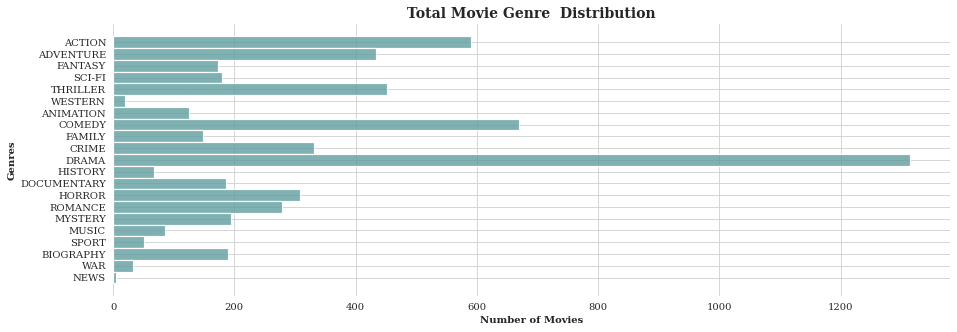

In [56]:
# making values uppercase 
exploded_genres['genres'] =  exploded_genres['genres'].str.upper()
    
# Create Plot
plt.figure(figsize=(15,5))

sns.set_style('whitegrid',{'font.family':'serif', 'font.serif':['Times New Roman']})

ax = sns.histplot(exploded_genres, y='genres', bins=10, multiple="stack", color='cadetblue',alpha=0.8)
                 

plt.title("Total Movie Genre  Distribution", fontdict= { 'fontsize': 14, 'fontweight':'bold'})
plt.xlabel("Number of Movies", fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel("Genres", fontdict= { 'fontsize': 10, 'fontweight':'bold'})
sns.despine(left=True, bottom=True)
#plt.savefig('./images/fig2.png')
plt.show()

Based on the total amount of the movies produced Drama genre exceeds the rest of the movie genres. Genres comedy and action  are the next frequently made movie genres. However, based on the Return on the Investment  we can see different movie genres which are fantasy, horror and mystery.

In [57]:
# creating plot
alt.Chart(top_genre, title='Average Return On Investment For Top Movie Genres').mark_bar(opacity=0.8).encode(
x=alt.X('roi', title='Average Return on Investment in Millions'),
y=alt.Y('genres', sort='-x', title='Movie Genres'),
 
# the highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.roi >= 450,  #this test returns True,
        alt.value('cadetblue'),     # if it is true sets the bar blue
        alt.value('lightgrey')   # and if it's not true it sets the bar grey.
    )
).properties(width=750,height =300)


alt.Chart(...)

Interestingly, I was attracted to those top genres of films for which a high return on the investment required a smaller production budget, especially horror and mystery, which did not exceed  30 million dollars  in production  that plotted below

In [58]:
# creating plot
alt.Chart(top_genre, title='Average Production Budget of the Movies Genres').mark_bar(opacity=0.8).encode(
x=alt.X('production_budget', title='Production Budget in Millions'),
y=alt.Y('genres', sort='-x', title='Movie Genres'),
 
# the highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.roi >= 450,  #this test returns True,
        alt.value('cadetblue'),     # if it is true sets the bar blue
        alt.value('lightgray')   # and if it's not true it sets the bar grey.
    )
).properties(width=750,height =300)

alt.Chart(...)

####  Movie Directors

In [59]:
# creating plot
alt.Chart(top_direc, title='Top Movie Directors Based on the Profit').mark_bar(opacity=0.8).encode(
x=alt.X('mean_profit', title='Average Profit in Millions'),
y=alt.Y('direc_name', sort='-x', title='Directors'),
 
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.mean_profit > 270000000,  #  setting the condition value,
        alt.value('cadetblue'),     # if the condition is True sets the bar blue
        alt.value('lightgray')   # and if it's not true it sets the bar blue.
       
    
    )
).properties(width=750,height=300)

alt.Chart(...)

In [60]:
# filtering certain values by rows
d1 = final_df[(final_df['direc_name']=='Francis Lawrence')]
d2 = final_df[(final_df['direc_name']=='Zack Snyder')]
d3 = final_df[(final_df['direc_name']=='Kenneth Branagh')]

In [61]:
# cancatinating the tables
final_direc = pd.concat([d1, d2,d3], ignore_index=True, sort=False)
final_direc

,title,production_budget,direc_name,movie_id,genres,writer_name,budget_bins,profit,roi
0,The Hunger Games: Mockingjay - Part 2,160000000,Francis Lawrence,tt1951266,"[Action, Adventure, Sci-Fi]",Danny Strong,150M_170M,488986787.00,305.62
1,The Hunger Games: Catching Fire,130000000,Francis Lawrence,tt1951264,"[Action, Adventure, Sci-Fi]",Suzanne Collins,130M_150M,734868047.00,565.28
2,The Hunger Games: Mockingjay - Part 1,125000000,Francis Lawrence,tt1951265,"[Action, Adventure, Sci-Fi]",Danny Strong,90M_130M,641575131.00,513.26
3,Red Sparrow,69000000,Francis Lawrence,tt2873282,"[Action, Drama, Thriller]",Justin Haythe,50M_70M,76951861.00,111.52
4,Water for Elephants,38000000,Francis Lawrence,tt1067583,"[Drama, Romance]",Richard LaGravenese,30M_50M,78809717.00,207.39
5,Justice League,300000000,Zack Snyder,tt0974015,"[Action, Adventure, Fantasy]",Bob Kane,over_170M,355945209.00,118.65
6,Batman v Superman: Dawn of Justice,250000000,Zack Snyder,tt2975590,"[Action, Adventure, Fantasy]",Bob Kane,over_170M,617500281.00,247.00
7,Man of Steel,225000000,Zack Snyder,tt0770828,"[Action, Adventure, Sci-Fi]",Christopher Nolan,over_170M,442999518.00,196.89
8,Legend of the Guardians: The Owls of Ga'Hoole,100000000,Zack Snyder,tt1219342,"[Action, Adventure, Animation]",John Orloff,90M_130M,39716717.00,39.72
9,Sucker Punch,75000000,Zack Snyder,tt0978764,"[Action, Adventure, Fantasy]",Steve Shibuya,70M_90M,14758389.00,19.68


In [62]:
# grouping the directors based on their movie budgets
direc_budget = final_direc.groupby('direc_name').mean().reset_index().sort_values('production_budget', ascending=False)
direc_budget['direc_name'] = direc_budget['direc_name'].map(str.upper)
direc_budget

,direc_name,production_budget,profit,roi
2,ZACK SNYDER,190000000,294184022.80,124.39
0,FRANCIS LAWRENCE,104400000,404238308.60,340.62
1,KENNETH BRANAGH,72580000,272373905.60,2059.90


In [63]:
# creating plot
alt.Chart(direc_budget, title='Movies Average Production Budget of Top Directors').mark_bar(opacity=0.8,
            color='cadetblue').encode(
x=alt.X('production_budget', title='Average Production Budget in  Millions'),
y=alt.Y('direc_name', sort='-x', title='Directors'),

).properties(width=750,height =80)


alt.Chart(...)

#### Movie Writers

In [64]:
# creating plot
alt.Chart(top_wrt, title='Top Movie Writers Based on the Profit').mark_bar(opacity=0.8).encode(
x=alt.X('mean_profit', title='Average Profit in Millions'),
y=alt.Y('writer_name', sort='-x', title='Movie Writers'),
 
# the highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.mean_profit >=400000000,  # setting the condition value
        alt.value('cadetblue'), # if the condition is True sets the bar blue
        alt.value('lightgrey')  # and if it's not True it sets the bar grey.
    )
).properties(width=750,height =300)


alt.Chart(...)

I wanted to further analyze and see the production budget of the films written by Christopher Nolan, Jack Kirby and Brian Lynch.

In [65]:
w1 = final_df[(final_df['writer_name']=='Christopher Nolan')]
w2 = final_df[(final_df['writer_name']=='Jack Kirby')]
w3 = final_df[(final_df['writer_name']=='Brian Lynch')]
final_wrt = pd.concat([w1, w2,w3], ignore_index=True, sort=False)
final_wrt

,title,production_budget,direc_name,movie_id,genres,writer_name,budget_bins,profit,roi
0,The Dark Knight Rises,275000000,Christopher Nolan,tt1345836,"[Action, Thriller]",Christopher Nolan,over_170M,809439099.00,294.34
1,Man of Steel,225000000,Zack Snyder,tt0770828,"[Action, Adventure, Sci-Fi]",Christopher Nolan,over_170M,442999518.00,196.89
2,Interstellar,165000000,Christopher Nolan,tt0816692,"[Adventure, Drama, Sci-Fi]",Christopher Nolan,150M_170M,501379375.00,303.87
3,Inception,160000000,Christopher Nolan,tt1375666,"[Action, Adventure, Sci-Fi]",Christopher Nolan,150M_170M,675524642.00,422.20
4,Dunkirk,150000000,Christopher Nolan,tt5013056,"[Action, Drama, History]",Christopher Nolan,150M_170M,349837368.00,233.22
5,Dark Phoenix,350000000,Simon Kinberg,tt6565702,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,-200237650.00,-57.21
6,Avengers: Age of Ultron,330600000,Joss Whedon,tt2395427,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,1072413963.00,324.38
7,Captain America: Civil War,250000000,Joe Russo,tt3498820,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,890069413.00,356.03
8,Black Panther,200000000,Ryan Coogler,tt1825683,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,1148258224.00,574.13
9,X-Men: Days of Future Past,200000000,Bryan Singer,tt1877832,"[Action, Adventure, Sci-Fi]",Jack Kirby,over_170M,547862775.00,273.93


In [66]:
# grouping the writers based on their movie budgets
wrt_budget = final_wrt.groupby('writer_name').mean().reset_index().sort_values('production_budget', ascending=False)
wrt_budget['writer_name'] = wrt_budget['writer_name'].map(str.upper)
wrt_budget

,writer_name,production_budget,profit,roi
1,CHRISTOPHER NOLAN,195000000,555836000.40,290.10
2,JACK KIRBY,186318750,500108401.88,276.82
0,BRIAN LYNCH,84400000,496416654.60,623.68


In [67]:
# creating plot
alt.Chart(wrt_budget, title='Movies Average Production Budget of Top Directors').mark_bar(opacity=0.8,
            color='cadetblue').encode(
x=alt.X('production_budget', title='Average Production Budget in  Millions'),
y=alt.Y('writer_name', sort='-x', title='Screenwriters'),

).properties(width=750,height =80)


alt.Chart(...)

## Conclusion

The above analysis leads to three recommendations for Microsoft to release a successful film studio :
- Based on Microsoft's investment, I would suggest starting with movie genres with a smaller production budget of about 25 million dolllars which are *mystery* and *horror*, then increasing up to 75 million dollars with the *fantasy* genre. They are the best genres with the greatest return on investments 
- For the directing  of movies, I would recommend working with *Francis Lawrence* and *Kenneth Branagh* along with an average  production volume of 1 million to 105 million. *Zack Snyder* is best suited for films with the highest production budget ove the 170 million.They all are the most profitable directors in the movie industry.
- For the production of a film in average worth up to 85 million dollars, I would recommend *Brian Lynch* as a screenwriter. Whereas, *Christopher Nolan* and *Jack Kirby* are suitable screenwriters for the movies with the higher production budget. They are all the most successful film screenwriters.

### Next Steps

- Further analysis could be improved by adding additional data as it becomes available. It could also be expanded upon by determining release times of the movies and other influencing attributes such as actor and actresses.
_ 